In [1]:
import pandas
import pycaret
import numpy as np
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import MinMaxScaler
#import smogn

In [2]:
filename = "Data_2021_08_11_v1.csv"

In [3]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN

array_len = len(csv)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real
    

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")

R1 = np.zeros(array_len)
R2 = np.zeros(array_len)

for i in range(0, array_len): 
    R1[i] = csv['copperloss_tx'][i]/csv['I1'][i]/csv['I1'][i]
    R2[i] = csv['copperloss_rx'][i]/csv['I2'][i]/csv['I2'][i]

csv = csv.assign(R1 = R1)
csv = csv.assign(R2 = R2)

csv = csv[csv['Lmt']<20].reset_index(drop=True)
csv = csv[csv['Lmt']>5].reset_index(drop=True)
csv = csv[csv['Lmr']<20].reset_index(drop=True)
csv = csv[csv['Lmr']>5].reset_index(drop=True)

csv = csv[csv['R1']<0.15].reset_index(drop=True)
csv = csv[csv['R1']>0.03].reset_index(drop=True)
csv = csv[csv['R2']<0.15].reset_index(drop=True)
csv = csv[csv['R2']>0.03].reset_index(drop=True)


# N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx

C:\Users\USER\AppData\Local\Temp/ipykernel_16796/726190926.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['I1'][i] = csv['I1'][i].replace('i', 'j')
C:\Users\USER\AppData\Local\Temp/ipykernel_16796/726190926.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['I2'][i] = csv['I2'][i].replace('i', 'j')
C:\Users\USER\AppData\Local\Temp/ipykernel_16796/726190926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['I1'][i] 

<AxesSubplot:>

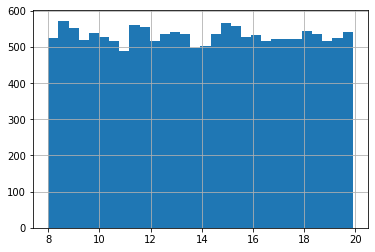

In [18]:
l1 = csv['l1'].reset_index(drop=True)#drop NaN

l1.hist(bins=30)

<AxesSubplot:>

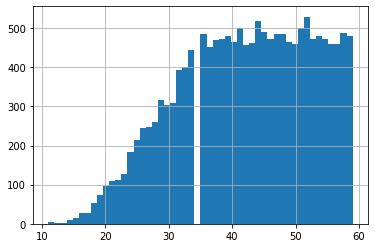

In [20]:
l2 = csv['l2'].reset_index(drop=True)#drop NaN

l2.hist(bins=50)

<AxesSubplot:>

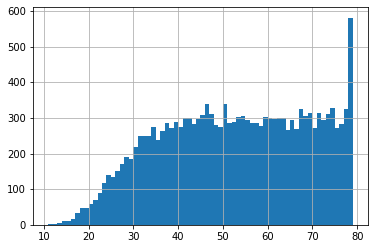

In [27]:
h1 = csv['h1'].reset_index(drop=True)#drop NaN

h1.hist(bins=68)

<AxesSubplot:>

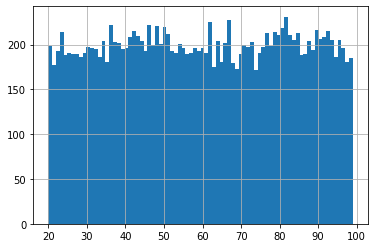

In [33]:
w1 = csv['w1'].reset_index(drop=True)#drop NaN

w1.hist(bins=80)

<AxesSubplot:>

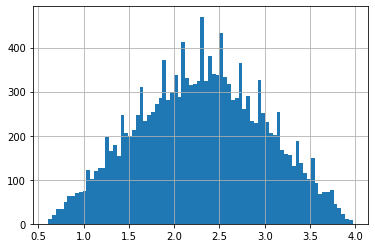

In [34]:
move_tx = csv['move_tx'].reset_index(drop=True)#drop NaN

move_tx.hist(bins=80)

<AxesSubplot:>

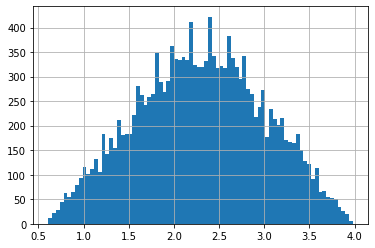

In [35]:
move_rx = csv['move_rx'].reset_index(drop=True)#drop NaN

move_rx.hist(bins=80)

<AxesSubplot:>

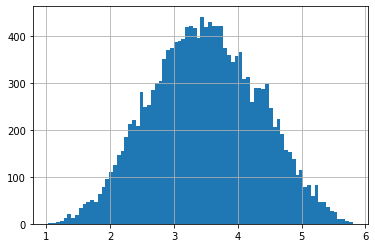

In [37]:
space5 = csv['space5'].reset_index(drop=True)#drop NaN

space5.hist(bins=80)

<AxesSubplot:>

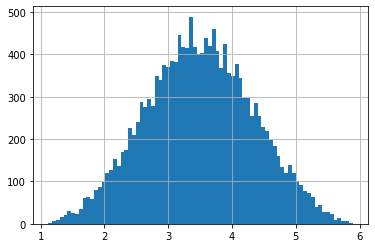

In [38]:
space6 = csv['space6'].reset_index(drop=True)#drop NaN

space6.hist(bins=80)

<AxesSubplot:>

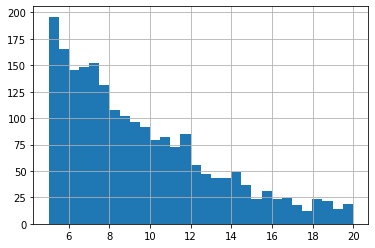

In [7]:
Lmt = csv['Lmt'].reset_index(drop=True)#drop NaN

Lmt.hist(bins=30)


<AxesSubplot:>

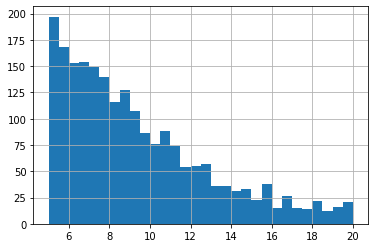

In [6]:
Lmr = csv['Lmr'].reset_index(drop=True)#drop NaN

Lmr.hist(bins=30)


<AxesSubplot:>

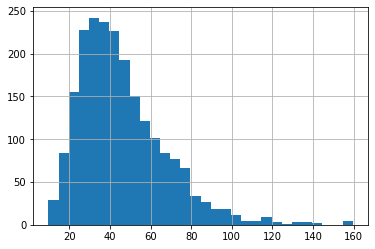

In [4]:
Llt = csv['Llt'].reset_index(drop=True)#drop NaN

Llt.hist(bins=30)


<AxesSubplot:>

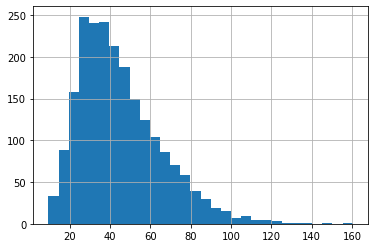

In [5]:
Llr = csv['Llr'].reset_index(drop=True)#drop NaN

Llr.hist(bins=30)


<AxesSubplot:>

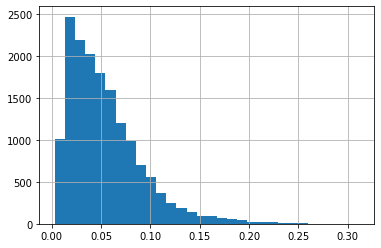

In [15]:
R1 = csv['R1'].reset_index(drop=True)#drop NaN

R1.hist(bins=30)

<AxesSubplot:>

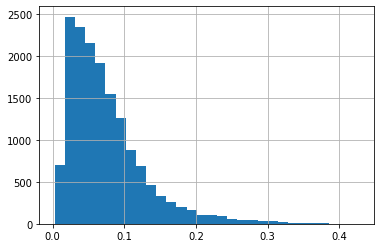

In [16]:
R2 = csv['R2'].reset_index(drop=True)#drop NaN

R2.hist(bins=30)

In [47]:
core_temp = 70

core_a = 0.6942
core_x = 1.4472
core_y = 2.4769
core_b = 4.7948
core_c = 0.0684
core_d = 4e-4
core_LT = core_b - core_c*core_temp + core_d*core_temp**2

[N1, N2, d1, d2, freq, move_tx, move_rx, offset_tx, offset_rx, per, space1, space2, space3, space4, space5, space6 ,l1, l2, h1, w1, I1, I2] = [ 1.38018286e+01,  1.87065782e+01,  1.62470230e+00,  1.63391825e+00,
        4.00000000e+04,  2.18445366e+00,  2.70475223e+00, -1.11712676e-01,
       -2.33272503e-01,  3.49936055e+03,  2.60399021e+00,  8.83479634e+00,
        3.74090975e+00,  1.25117998e+01,  3.51440088e+00,  4.65036639e+00,
        1.44913647e+01,  1.44702827e+01,  2.67703592e+01,  9.94837713e+01,
        4.36000000e+00,  3.17000000e+00]

d1 = d1*1e-3
d2 = d2*1e-3
move_tx = move_tx*1e-3
move_rx = move_rx*1e-3
offset_tx = offset_tx*1e-3
offset_rx = offset_rx*1e-3
l1 = l1*1e-3
l2 = l2*1e-3
h1 = h1*1e-3
w1 = w1*1e-3
space1 = space1*1e-3
space2 = space2*1e-3
space3 = space3*1e-3
space4 = space4*1e-3
space5 = space5*1e-3
space6 = space6*1e-3

Lmt = 21.816e-3

V1 = 459.2
mag_current = V1/(2*3.141592*freq)/Lmt
Req = N1**2/Lmt
flux = N1 * mag_current/Req
B = flux / (2*w1*l1)
V_core = ((h1 + 2*l1)*(4*l1+2*l2)*(w1) - 2*l2*h1*w1) # Core volue [unit : m^3]
coreloss = core_a * freq**core_x * B**core_y * core_LT * V_core # coreloss [unit : W]

copperloss = 0.633 + 0.571

Req

#totalloss = coreloss + copperloss
#totalloss

8731.686500906582

In [51]:
V_core

0.0004049516692116111

In [ ]:
# top3 = [ create_model(name) for name in ["xgboost","lightgbm", "rf"] ]
top3 = compare_models(n_select = 3) 

In [119]:
tuned_top3 = [tune_model(i) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.9049,746.0019,27.3130,0.7383,0.3191,0.2926
1,16.8687,763.9066,27.6389,0.7325,0.3293,0.3021
2,14.2050,436.5667,20.8942,0.7655,0.3218,0.2874
3,16.9017,841.0990,29.0017,0.7152,0.3119,0.2821
4,15.4068,762.5808,27.6149,0.7373,0.3012,0.2613
5,14.6243,539.1791,23.2202,0.7688,0.3224,0.3084
6,13.8470,435.1683,20.8607,0.7673,0.2984,0.2797
7,13.4815,408.0197,20.1995,0.7586,0.3026,0.2783
8,13.0924,400.7054,20.0176,0.7756,0.2908,0.2586
9,14.2030,582.7733,24.1407,0.7419,0.3088,0.2721


In [120]:
bagged_top3 = [ensemble_model(i) for i in tuned_top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.7057,568.0515,23.8338,0.8007,0.3062,0.2108
1,12.1939,508.0338,22.5396,0.8221,0.2893,0.2199
2,8.8350,221.7533,14.8914,0.8809,0.2838,0.1846
3,12.3117,553.1125,23.5183,0.8127,0.3372,0.2078
4,11.5958,627.0083,25.0401,0.7840,0.2404,0.1975
5,10.6940,381.3535,19.5283,0.8365,0.3340,0.2313
6,10.3142,277.1040,16.6464,0.8518,0.3081,0.2207
7,9.9915,256.1900,16.0059,0.8484,0.2717,0.2168
8,9.7122,248.1072,15.7514,0.8611,0.2782,0.2088
9,10.5449,378.8904,19.4651,0.8322,0.2830,0.2141


IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [ ]:
blender = blend_models(estimator_list = top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0268,20.3612,4.5123,0.9414,0.1750,0.1815
1,1.7174,9.6899,3.1129,0.9614,0.1682,0.1864
2,1.6730,9.2486,3.0411,0.9625,0.1769,0.1895
3,2.2676,32.0966,5.6654,0.9272,0.1796,0.1821
4,1.6651,9.7463,3.1219,0.9697,0.1712,0.1898
5,1.5894,9.1200,3.0199,0.9638,0.1734,0.1890
6,1.7401,12.4778,3.5324,0.9533,0.1667,0.1793
7,1.8478,9.9360,3.1521,0.9634,0.1599,0.1794
8,1.7501,9.2016,3.0334,0.9700,0.1597,0.1747
9,1.4841,6.3584,2.5216,0.9712,0.1575,0.1683


In [ ]:
best5 = automl(optimize = 'RMSE')

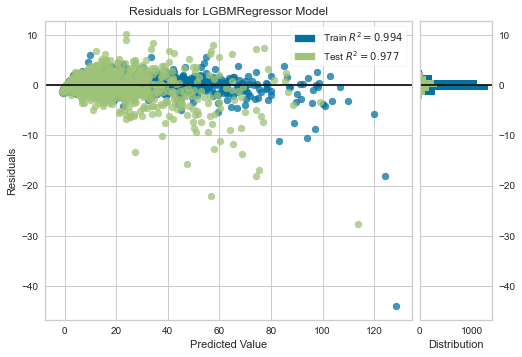

In [ ]:
plot_model(best5)

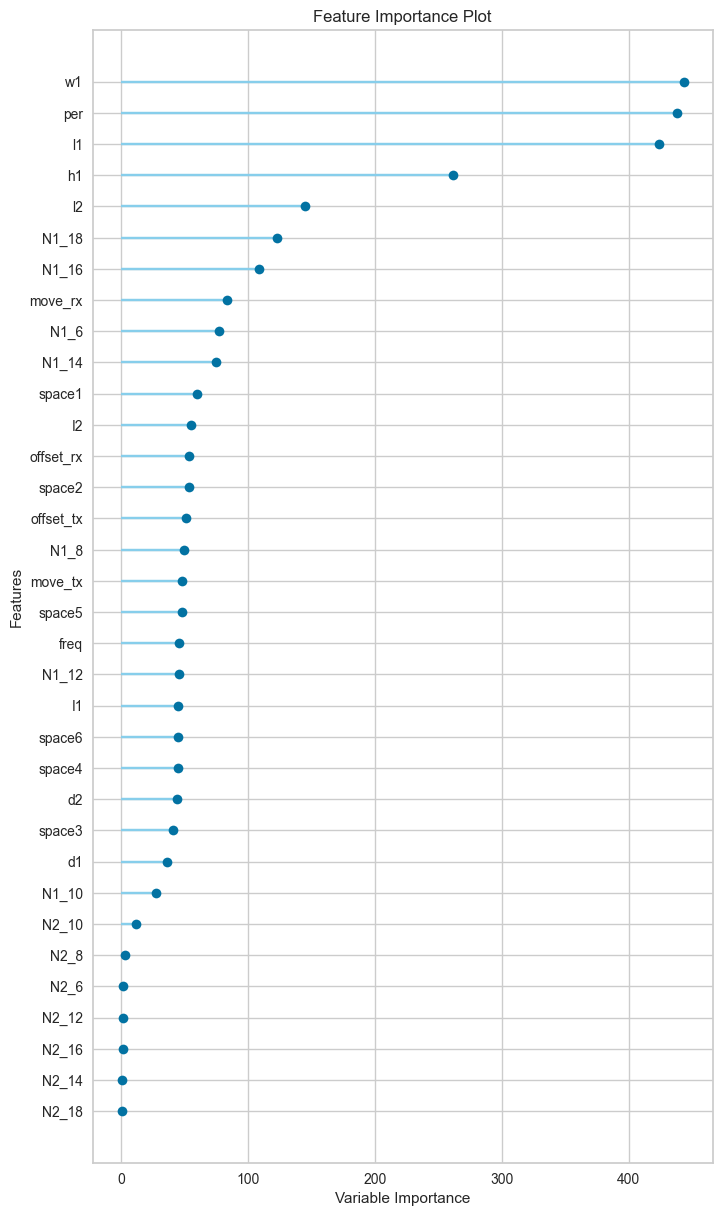

In [ ]:
plot_model(estimator = best5, plot = 'feature_all')

In [ ]:
evaluate_model(best5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#save_model(best5, "ML_model2_v2_2021_08_09_Llk")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Lmt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, device='gpu',
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=20,
                            